### Importing neccessary libary

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

### Imoporting data from `ucimlrepo`

In [19]:

# fetch dataset 
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X = automobile.data.features 
y = automobile.data.targets 
  
# metadata 
print(automobile.metadata) 
  
# variable information 
print(automobile.variables) 

{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

### EDA

In [95]:
# Fetch dataset
automobile = fetch_ucirepo(id=10)

In [96]:
# Convert features and targets to numeric values
features_df = pd.DataFrame(automobile.data.features)
targets_df = pd.DataFrame(automobile.data.targets)

features_df.head(10)

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0
5,15250.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,177.3,99.8,front,fwd,sedan,2.0,std,gas,audi,NaN
6,17710.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,192.7,105.8,front,fwd,sedan,4.0,std,gas,audi,158.0
7,18920.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,192.7,105.8,front,fwd,wagon,4.0,std,gas,audi,NaN
8,23875.0,20,17,5500.0,140.0,8.3,3.40,3.13,mpfi,131,...,192.7,105.8,front,fwd,sedan,4.0,turbo,gas,audi,158.0
9,NaN,22,16,5500.0,160.0,7.0,3.40,3.13,mpfi,131,...,178.2,99.5,front,4wd,hatchback,2.0,turbo,gas,audi,NaN


### Convert data to numberic numbers

In [94]:
X = features_df.apply(pd.to_numeric, errors='coerce').fillna(0)
y = targets_df.apply(pd.to_numeric, errors='coerce').fillna(0)

X.head(10)

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,0.0,130,...,168.8,88.6,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,0.0,130,...,168.8,88.6,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,0.0,152,...,171.2,94.5,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,0.0,109,...,176.6,99.8,0.0,0.0,0.0,4.0,0.0,0.0,0.0,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,0.0,136,...,176.6,99.4,0.0,0.0,0.0,4.0,0.0,0.0,0.0,164.0
5,15250.0,25,19,5500.0,110.0,8.5,3.40,3.19,0.0,136,...,177.3,99.8,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
6,17710.0,25,19,5500.0,110.0,8.5,3.40,3.19,0.0,136,...,192.7,105.8,0.0,0.0,0.0,4.0,0.0,0.0,0.0,158.0
7,18920.0,25,19,5500.0,110.0,8.5,3.40,3.19,0.0,136,...,192.7,105.8,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
8,23875.0,20,17,5500.0,140.0,8.3,3.40,3.13,0.0,131,...,192.7,105.8,0.0,0.0,0.0,4.0,0.0,0.0,0.0,158.0
9,0.0,22,16,5500.0,160.0,7.0,3.40,3.13,0.0,131,...,178.2,99.5,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [97]:
corr_matrix = X.corr()

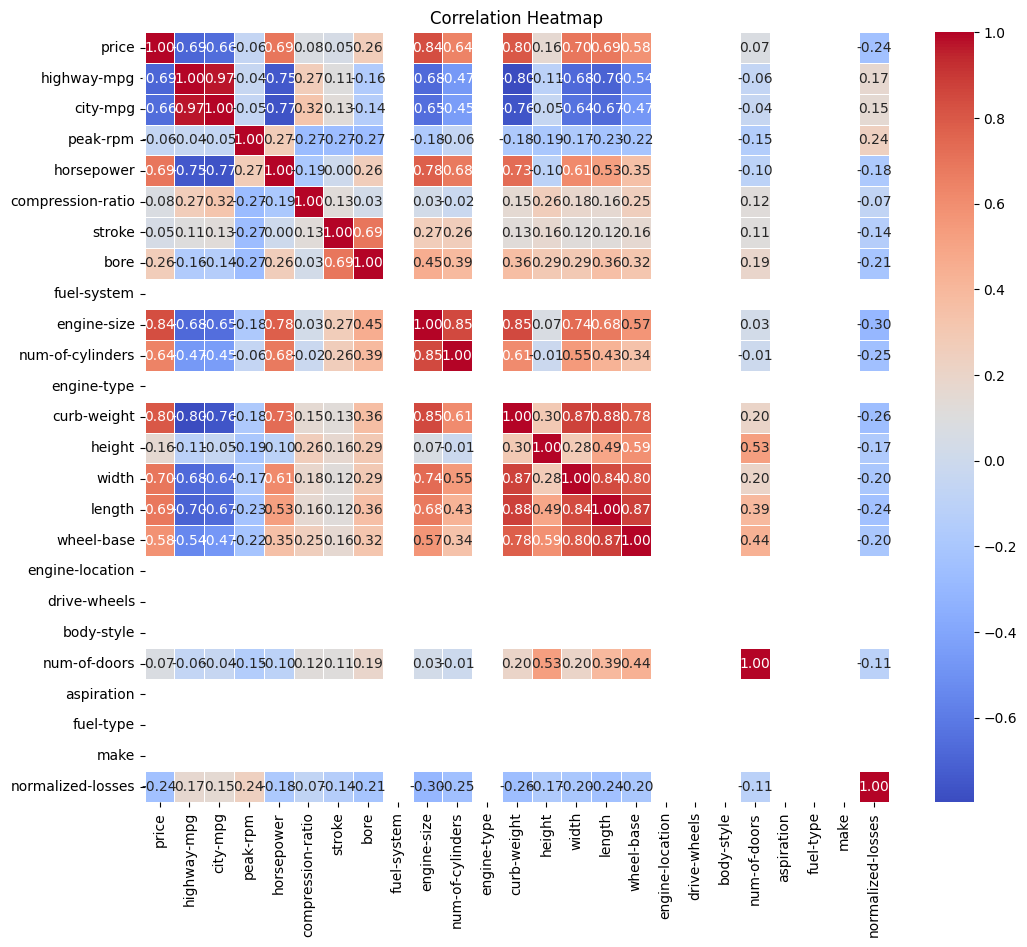

In [90]:
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Split data into training and testing sets

In [91]:
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
X_train
X_test.shape
y_test.shape

(41, 1)

In [70]:
# Define kernel
kernel = 1.0 * RBF(length_scale=1.0)
kernel

1**2 * RBF(length_scale=1)

In [38]:
# Train Gaussian Process
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=5),
                         n_restarts_optimizer=9)

In [51]:
# Evaluate model
mean_prediction, std_prediction = gaussian_process.predict(X_test, return_std=True)
mse = mean_squared_error(y_test, mean_prediction)
mae = mean_absolute_error(y_test, mean_prediction)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

mean_prediction

Mean Squared Error: 1.7337018591638624
Mean Absolute Error: 0.8633011374621447


array([ 0.00000000e+000,  2.29132788e-216,  2.56790589e-206,
        8.39427260e-126,  0.00000000e+000,  1.83650942e-079,
        1.76161852e-055,  6.65858460e-212,  2.04549760e-164,
        1.12125610e-058,  0.00000000e+000,  1.53666888e-040,
       -1.01891466e-204,  0.00000000e+000,  0.00000000e+000,
        2.59528060e-028,  1.96941592e-209,  4.28096963e-022,
       -2.89906517e-118,  1.95471793e-110,  2.69045960e-025,
        0.00000000e+000,  3.18273660e-063,  6.84580688e-155,
        7.31415193e-001,  0.00000000e+000,  9.75996686e-146,
        0.00000000e+000,  4.71533314e-040,  2.04648664e-206,
        0.00000000e+000,  9.08298187e-001,  2.53170895e-013,
        0.00000000e+000,  1.69253380e-012,  0.00000000e+000,
        1.69779636e-041,  0.00000000e+000,  3.50600160e-002,
        2.96362597e-171, -2.80828472e-147])

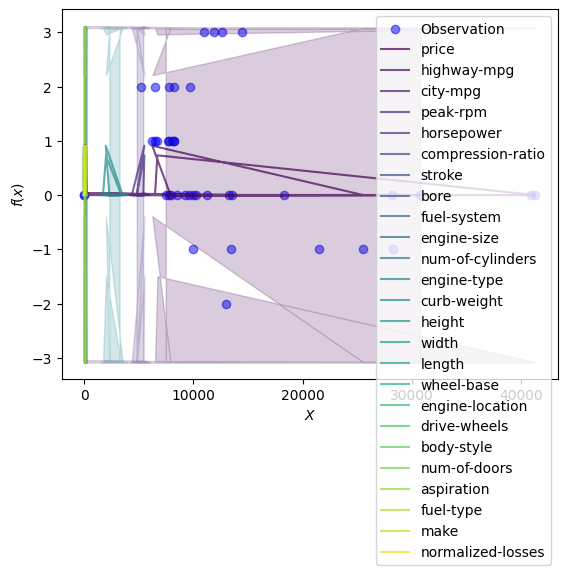

In [55]:
# Scatter plot for observations
plt.scatter(X_test[:, 0], y_test, label="Observation", color='blue', alpha=0.5)

# Plot mean prediction and confidence interval for each feature
for i in range(X_test.shape[1]):
    feature_label = features_df.columns[i]
    color = plt.cm.viridis(i / X_test.shape[1])  # Using a colormap to generate different colors
    
    plt.plot(X_test[:, i], mean_prediction, label=feature_label, color=color, alpha=0.7)
    plt.fill_between(
        X_test[:, i],
        mean_prediction - 2 * std_prediction,
        mean_prediction + 2 * std_prediction,
        alpha=0.2,
        color=color
    )

plt.legend()
plt.xlabel("$X$")
plt.ylabel("$f(x)$")
plt.show()

In [69]:
# Add noise to training targets
rng = np.random.RandomState(1)
noise_std = np.sqrt(0.03)
y_train_noisy = y_train + rng.normal(loc=0.0, scale=noise_std, size=y_train.shape)

In [68]:
# Evaluate model
mean_prediction, std_prediction = gaussian_process.predict(X_test, return_std=True)
mse = mean_squared_error(y_test, mean_prediction)
mae = mean_absolute_error(y_test, mean_prediction)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 1.7614507343311303
Mean Absolute Error: 0.8913916724393685


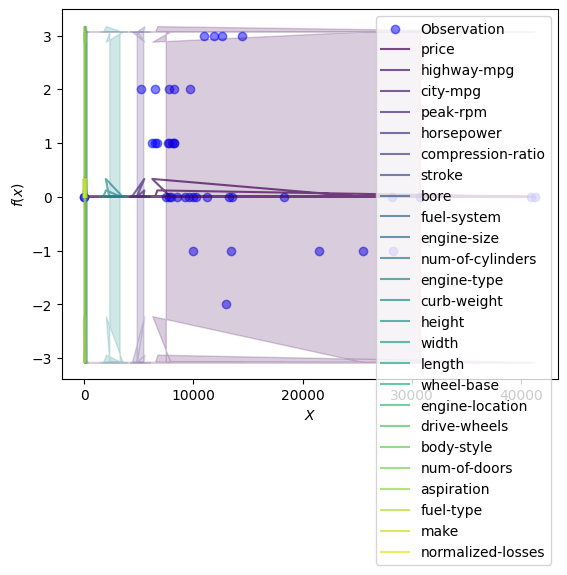

In [71]:
# Scatter plot for observations
plt.scatter(X_test[:, 0], y_test, label="Observation", color='blue', alpha=0.5)

# Plot mean prediction and confidence interval for each feature
for i in range(X_test.shape[1]):
    feature_label = features_df.columns[i]
    color = plt.cm.viridis(i / X_test.shape[1])  # Using a colormap to generate different colors
    
    plt.plot(X_test[:, i], mean_prediction, label=feature_label, color=color, alpha=0.7)
    plt.fill_between(
        X_test[:, i],
        mean_prediction - 2 * std_prediction,
        mean_prediction + 2 * std_prediction,
        alpha=0.2,
        color=color
    )

plt.legend()
plt.xlabel("$X$")
plt.ylabel("$f(x)$")
plt.show()